### Traffic flow

In [73]:
import sympy
from sympy import init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing()
%matplotlib inline

In [84]:
# initial problem parameters:
Vmax = 80     # maximum velocity [km/hr]
L = 11        # length of road [km]
rho_max = 250 # maximum car density [cars/km]

# discretization
nx = 50       # number of x steps
dx = L/(nx-1) # x step
dt = 0.001    # time step [hr]
T = 1         # total time [hr]
nt = int(T/dt)# number of time steps

dt_dx = dt/dx # ratio of dt/dx for use indiscritization function

# initial conditions
x = np.linspace(0,L,nx)
rho0 = np.ones(nx)*10
rho0[10:20] = 50
# Boundary condition rho(x = 0,t) = 10

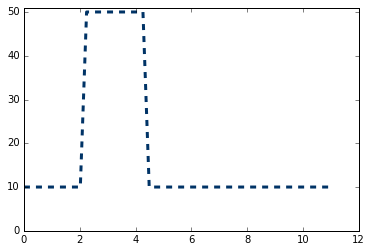

In [50]:
plt.plot(x,rho0,color='#003366', ls='--', lw=3)
plt.ylim(0,51);

In [81]:
# Functions
# Flux:
def flux(rho):
    return Vmax*rho*(1-rho/rho_max)

# Velocity:
def velocity(rho):
    return Vmax*(1-rho/rho_max)

# both functions:
def f(u):
    rho = u[0]
    v = u[1]
    F = u[2]
    return np.array([])

# discretization function
def solve_disc(u, f, dt_dx):
    return u - dt_dx*(f())

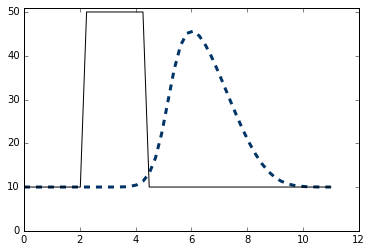

In [64]:
# initiallize solution:
u = np.ndarray(shape=(nt,3,len(rho0))) # multidimensional array for all solution 
                                       # data, each row is a different time step
                                       # the columns are for rho, v, and F
u = ([rho0, velocity(rho0), flux(rho0)])

# loop for solving discretized equation
for n in range(nt):
    un = u.copy()
    u[0]
    rho[1:-1] = rho_n[1:-1] - dt/dx*(F(rho_n[1:-1]) - F(rho_n[0:-2]))
    
plt.plot(x,rho,color='#003366', ls='--', lw=3)
plt.plot(x,rho0,color='k', lw=1)
plt.ylim(0, 51);

In [72]:
# minimum velocity at t = 0 in [m/s]
print('Minimum velocity at (t = 0): %.2f [m/s]'\
      % (np.min(velocity(rho0))*(1000/3600)))

Minimum velocity at (t = 0): 17.78 [m/s]


In [87]:
u = np.ndarray(shape=(nt,3,len(rho0))) # multidimensional array for all solution 
                                       # data, each row is a different time step
                                       # the columns are for rho, v, and F
un = ([rho0,velocity(rho0),flux(rho0)])
np.shape(u)